# DC Movies EDA

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Load the data

In [108]:
data=pd.read_csv("dceu_box_office_and_rating.csv",parse_dates=["release_date"])
data.head(10)
data.loc[7,"movie_title"]="Birds of Prey"  ## The name was so annoyingly big in plotting

In [109]:
data

,movie_title,release_date,duration (mins),budget ($),US_gross ($),worldwide_gross ($),imdb,metascore,tomatometer,audience_score
0,Man of Steel,2013-06-14,143,225000000,291045518,668045518,7.1,55,56,75
1,Batman v Superman: Dawn of Justice,2016-03-25,152,250000000,330360194,873637528,6.4,44,29,63
2,Suicide Squad,2016-08-05,123,175000000,325100054,746846894,5.9,40,26,58
3,Wonder Woman,2017-06-02,141,149000000,412845172,822854286,7.4,76,93,83
4,Justice League,2017-11-17,120,300000000,229024295,657926987,6.1,45,39,67
5,Aquaman,2018-12-21,143,200000000,335104314,1148528393,6.8,55,65,72
6,Shazam!,2019-04-05,132,100000000,140480049,367799011,7.0,71,90,82
7,Birds of Prey,2020-02-07,109,85000000,84172791,205372791,6.1,60,79,78
8,Wonder Woman 1984,2020-12-25,151,200000000,46801036,169601036,5.4,60,58,73
9,The Suicide Squad,2021-08-05,132,185000000,55817425,168717425,7.2,72,90,82


## Preprocessing

In [110]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          13 non-null     object        
 1   release_date         13 non-null     datetime64[ns]
 2   duration (mins)      13 non-null     int64         
 3   budget ($)           13 non-null     int64         
 4   US_gross ($)         13 non-null     int64         
 5   worldwide_gross ($)  13 non-null     int64         
 6   imdb                 13 non-null     float64       
 7   metascore            13 non-null     int64         
 8   tomatometer          13 non-null     int64         
 9   audience_score       13 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 1.9 KB


## EDA

### Top 10 Budget

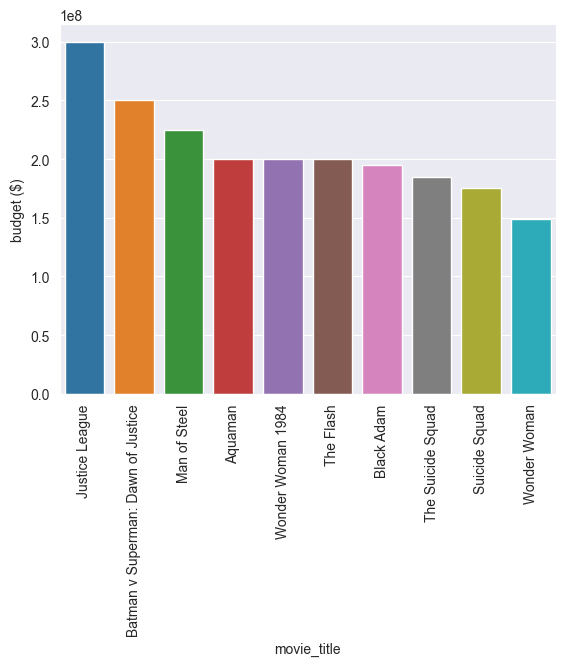

In [111]:
temp=data.sort_values(by="budget ($)",ascending=False).iloc[:10,:]
sns.barplot(x=temp["movie_title"],y=temp["budget ($)"])
plt.xticks(rotation=90)
plt.show()

In [112]:
fig=px.bar(data_frame=temp,x=temp["movie_title"],y=temp["budget ($)"],title="Top 10 Budget of DC ",text_auto=True)
fig.update_traces(textposition="outside")
fig.show()

## Top 10 Box Office

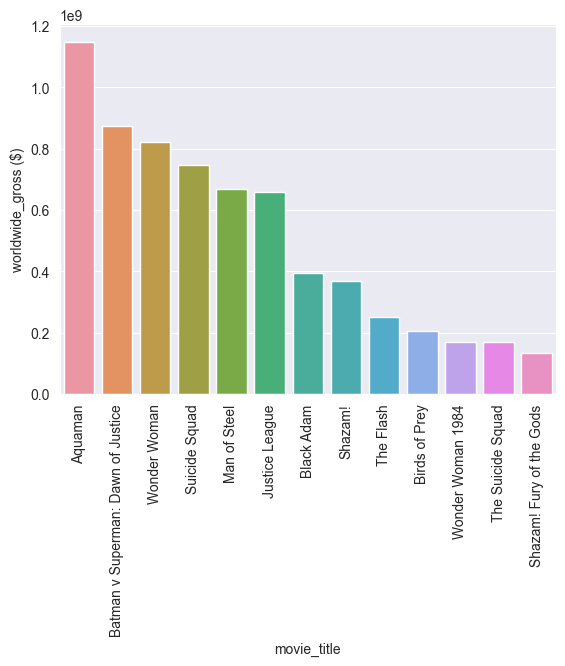

In [113]:
temp=data.sort_values(by="worldwide_gross ($)",ascending=False)
sns.barplot(x=temp["movie_title"],y=temp["worldwide_gross ($)"])
plt.xticks(rotation=90)
plt.show()

In [114]:
fig=px.bar(data_frame=temp,x=temp["movie_title"],y=[temp["worldwide_gross ($)"],temp["budget ($)"]],title="Top 10 Grossed DC Movies",text_auto=True)
fig.show()

## All the scores

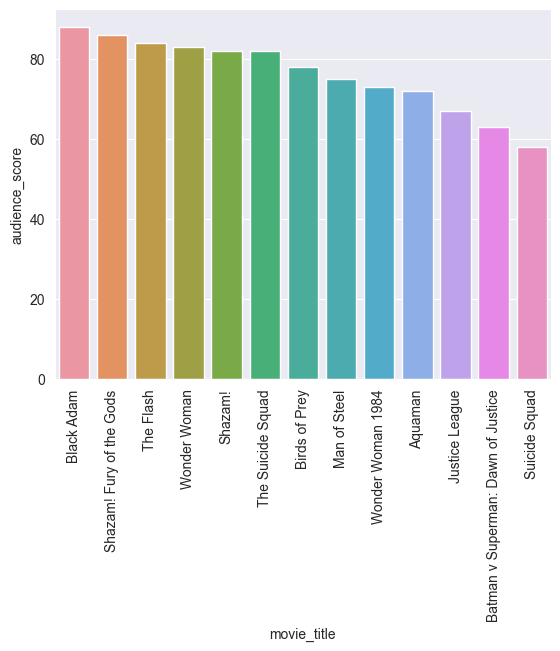

In [115]:
temp=data.sort_values(by="audience_score",ascending=False)
sns.barplot(x=temp["movie_title"],y=temp["audience_score"])
plt.xticks(rotation=90)
plt.show()

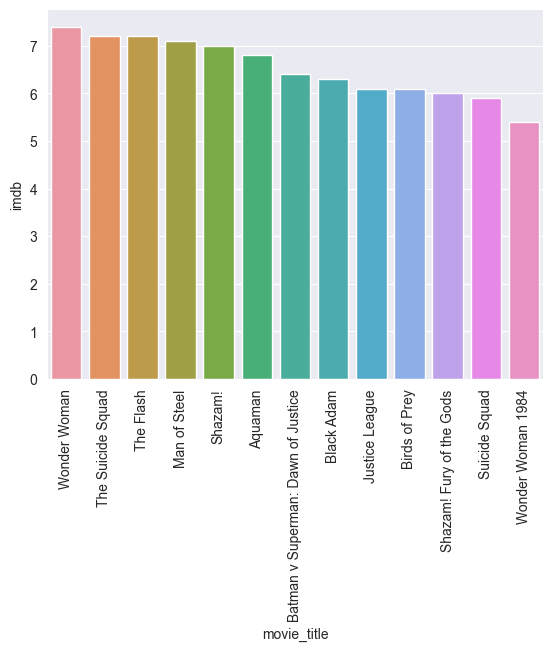

In [116]:
temp=data.sort_values(by="imdb",ascending=False)
sns.barplot(x=temp["movie_title"],y=temp["imdb"])
plt.xticks(rotation=90)
plt.show()

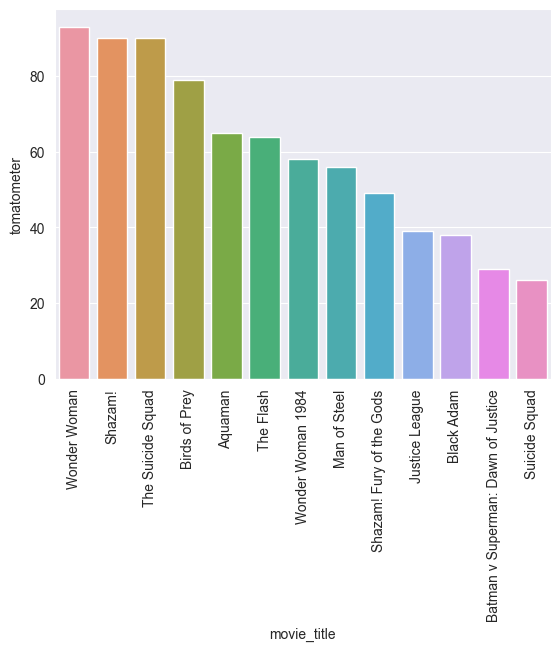

In [117]:
temp=data.sort_values(by="tomatometer",ascending=False)
sns.barplot(x=temp["movie_title"],y=temp["tomatometer"])
plt.xticks(rotation=90)
plt.show()

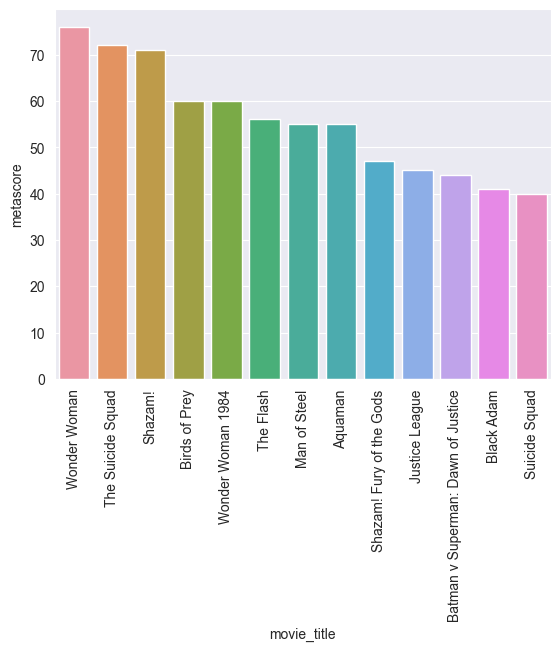

In [118]:
temp=data.sort_values(by="metascore",ascending=False)
sns.barplot(x=temp["movie_title"],y=temp["metascore"])
plt.xticks(rotation=90)
plt.show()

Wonder Woman is almost top in 3 bars

In [119]:
fig=px.bar(data_frame=data,x=data["movie_title"],y=[temp["audience_score"],temp["tomatometer"],temp["metascore"]],barmode="group",text_auto=True)
fig.show()

## Foreign vs USA

In [129]:
data["foreign"]=data["worldwide_gross ($)"]-data["US_gross ($)"]
temp=data.sort_values(by="foreign",ascending=False)

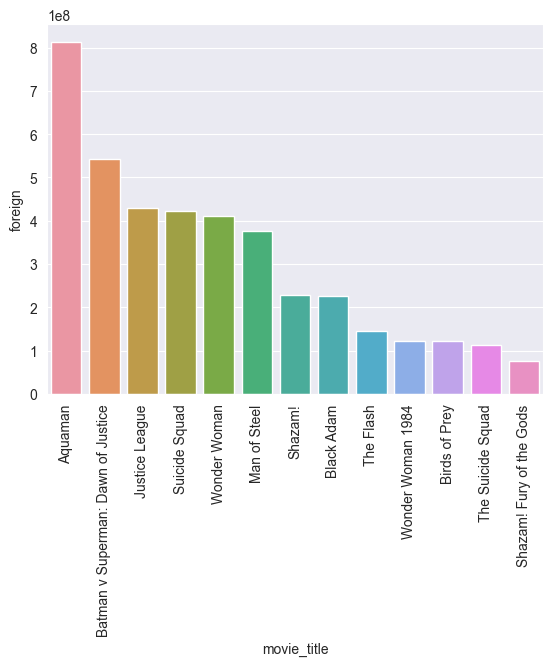

In [132]:
sns.barplot(data=temp,x=temp["movie_title"],y=temp["foreign"])
plt.xticks(rotation=90)
plt.show()

In [133]:
temp=data.sort_values(by="US_gross ($)",ascending=False)

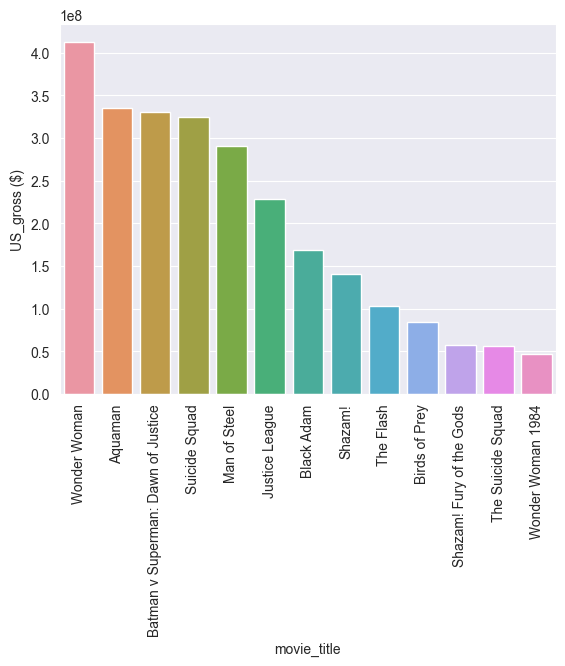

In [134]:
sns.barplot(data=temp,x=temp["movie_title"],y=temp["US_gross ($)"])
plt.xticks(rotation=90)
plt.show()

In [147]:
temp=temp.sort_values(by="worldwide_gross ($)",ascending=False)

In [156]:
fig=px.bar(temp,x="movie_title",y=["foreign","US_gross ($)"],text_auto=True,barmode="group")
fig.update_layout(xaxis={"categoryorder":"total descending"})
fig.show()

## Release date vs Budget

<AxesSubplot:xlabel='release_date', ylabel='worldwide_gross ($)'>

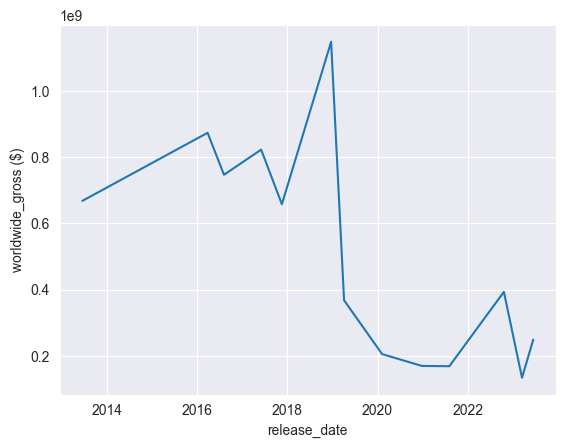

In [161]:
sns.lineplot(data=data,x=data["release_date"],y=data["worldwide_gross ($)"])

We can see in 2020 box office was very low
This was because of Corona

In [166]:
fig=px.line(data,x="release_date",y="worldwide_gross ($)",markers=True)
fig.show()

In [173]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data["release_date"],y=data["budget ($)"],name="Budget"))
fig.add_trace(go.Scatter(x=data["release_date"],y=data["worldwide_gross ($)"],name="Worldwide Gross"))
fig.add_trace(go.Scatter(x=data["release_date"],y=data["US_gross ($)"],name="US Gross"))
fig.show()